<a href="https://colab.research.google.com/github/Sf99-lab/pandas/blob/master/Handling_Time_Series_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

import matplotlib.pyplot as plt

air_quality = pd.read_csv("/content/sample_data/air_quality_no2_long.csv")
air_quality = air_quality.rename(columns={"date.utc": "datetime"})
air_quality.head()


,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


In [ ]:
air_quality.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

***Below is shown how to work with the dates in the column `datetime` as datetime objects instead of plain text?***

In [ ]:
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])

air_quality["datetime"]


0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: datetime1, Length: 2068, dtype: datetime64[ns, UTC]

# **showing start and end date of the time series data set**

In [ ]:
air_quality["datetime"].min(), air_quality["datetime"].max()


('2019-05-07 01:00:00+00:00', '2019-06-21 00:00:00+00:00')

# **Calculate date information**

In [8]:
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])
time_delta = air_quality["datetime"].max() - air_quality["datetime"].min()
print(time_delta)


44 days 23:00:00


# **add a new column to the DataFrame containing only the month of the measurement**

In [ ]:
air_quality["month"] = air_quality["datetime"].dt.month #this will extract the month from datetime column and add this as new column

air_quality.head()

,city,country,datetime,location,parameter,value,unit,month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6


# **Calculating average NO2 concentration for each day of the week for each of the measurement locations.**

In [5]:
air_quality.groupby(
    [air_quality["datetime"].dt.weekday, "location"])["value"].mean()

datetime  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

# **calculate a given statistic (e.g. mean NO2) for each hour of the day.**

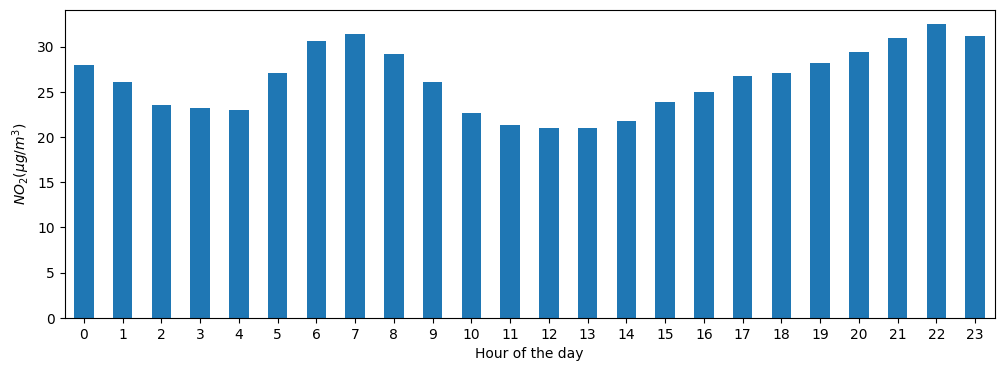

In [10]:
fig, axs = plt.subplots(figsize=(12, 4))

air_quality.groupby(air_quality["datetime"].dt.hour)["value"].mean().plot(
    kind='bar', rot=0, ax=axs
)
plt.xlabel("Hour of the day");  # custom x label using Matplotlib

plt.ylabel("$NO_2 (µg/m^3)$");